### 210629 한경아카데미 서현진

# 2차 경진대회
load_digits()

In [1052]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [1053]:
from sklearn.datasets import load_digits
digits = load_digits()

digits_df = pd.DataFrame(digits.data, columns=digits.feature_names) 
digits_df['Target'] = digits.target 
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [1054]:
digits_df.iloc[:,-1].value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: Target, dtype: int64

## 데이터 전처리

In [1055]:
# 스케일링 x
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(digits_df.iloc[:,:-1].values)

In [1056]:
# y
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(digits.target)
y_onehot[:3]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [1067]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y_onehot, stratify=y_onehot, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1347, 64), (450, 64), (1347, 10), (450, 10))

# 모델 정의 / 학습

In [1058]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# case2  채택
model = Sequential([
    Dense(200, input_dim=64, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 200)               13000     
_________________________________________________________________
dense_159 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_160 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_161 (Dense)            (None, 10)                510       
Total params: 38,660
Trainable params: 38,660
Non-trainable params: 0
_________________________________________________________________


In [1059]:
# case3  
model = Sequential([
    Dense(400, input_dim=64, activation='relu'),
    Dense(250, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_353 (Dense)            (None, 400)               26000     
_________________________________________________________________
dense_354 (Dense)            (None, 250)               100250    
_________________________________________________________________
dense_355 (Dense)            (None, 50)                12550     
_________________________________________________________________
dense_356 (Dense)            (None, 10)                510       
Total params: 139,310
Trainable params: 139,310
Non-trainable params: 0
_________________________________________________________________


In [1060]:
# case1   optimizer='adam', # 채택
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

## 모델 학습 및 저장

In [1061]:
# 저장설정
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
modelpath = 'model/best_digits_grade.h5'
checkpointer = ModelCheckpoint(
    modelpath, monitor='val_loss', verbose=0, save_best_only=True
)
early_stopping = EarlyStopping(patience=20)

#학습
history = model.fit(
    X_train, Y_train, validation_split=0.1,
    epochs=700, batch_size=30, verbose=0,
    callbacks=[checkpointer, early_stopping]
)
# 베스트 모델
from tensorflow.keras.models import load_model
best_model = load_model('model/best_digits_grade.h5')
best_model.evaluate(X_test, Y_test)


15/15 [==============================] - 0s 997us/step - loss: 0.1050 - accuracy: 0.9778


[0.10499745607376099, 0.9777777791023254]

# 시각화

In [1062]:
import matplotlib.pyplot as plt
%matplotlib inline

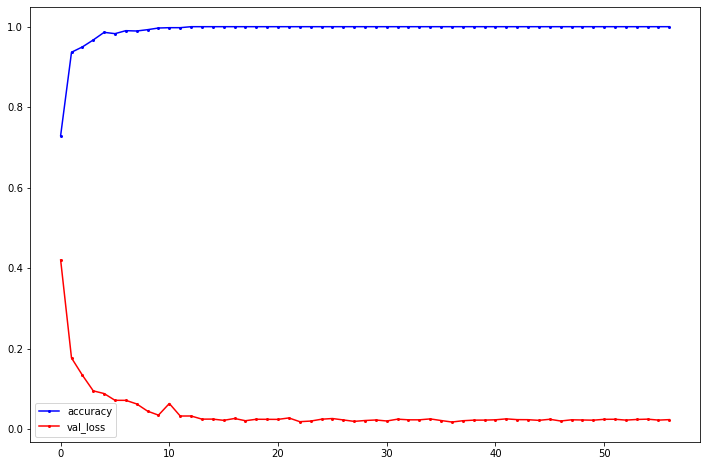

In [1065]:

y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()